In [1]:
# +/- 10% MIXED SIGMA

import subprocess
import os
import re


def run_lammps_simulation(input_file, output_file, seed):
    # Modify the input file to include the random seed
    with open(input_file, 'r') as file:
        data = file.readlines()
    
    # Find the line where the random seed is set and modify it
    for i, line in enumerate(data):
        if 'velocity     all create' in line:
            data[i] = f"velocity     all create 300.0 {seed} mom yes rot yes dist gaussian\n"
            break
    
    # Write the modified input file
    with open(input_file, 'w') as file:
        file.writelines(data)
    
    # Run the LAMMPS simulation
    subprocess.run(['lmp_serial', '-in', input_file])

    # After running, extract the thermal conductivity value from the output file
    with open(output_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Look for the line that contains 'average conductivity'
            if 'average conductivity' in line:
                # Extract the numeric value using a regex pattern
                match = re.search(r'average conductivity: ([0-9.e+-]+)', line)
                if match:
                    k_value = float(match.group(1))  # Extracted value
                    return k_value
    
    return None

def run_simulations(input_file, output_file, num_runs):
    results = []
    for i in range(num_runs):
        seed = 102486 + i  # You can use any formula for the seed, or randomize
        print(f"Running simulation {i+1} with seed {seed}")
        k_value = run_lammps_simulation(input_file, output_file, seed)
        if k_value is not None:
            results.append(k_value)
        else:
            print(f"Simulation {i+1} failed to extract conductivity.")
    
    return results

# Define the paths to files
input_file_long = 'LJsim_diff_2.txt'
output_file_long = 'log.lammps'  # output filename

# Run the simulations
results_long = run_simulations(input_file_long, output_file_long, 10)  # Run 10 simulations

# Print the results
print("Thermal conductivity results:")
for i, k in enumerate(results_long, 1):
    print(f"Run {i}: {k} W/mK")

Running simulation 1 with seed 102486
Running simulation 2 with seed 102487
Running simulation 3 with seed 102488
Running simulation 4 with seed 102489
Running simulation 5 with seed 102490
Running simulation 6 with seed 102491
Running simulation 7 with seed 102492
Running simulation 8 with seed 102493
Running simulation 9 with seed 102494
Running simulation 10 with seed 102495
Thermal conductivity results:
Run 1: 0.272721788851338 W/mK
Run 2: 0.275460168813128 W/mK
Run 3: 0.264410013497934 W/mK
Run 4: 0.26183218167908 W/mK
Run 5: 0.257603832082389 W/mK
Run 6: 0.263000593404672 W/mK
Run 7: 0.285958889706002 W/mK
Run 8: 0.274390261976748 W/mK
Run 9: 0.279176845966347 W/mK
Run 10: 0.285629363540971 W/mK


In [2]:
print(results_long)

[0.272721788851338, 0.275460168813128, 0.264410013497934, 0.26183218167908, 0.257603832082389, 0.263000593404672, 0.285958889706002, 0.274390261976748, 0.279176845966347, 0.285629363540971]


In [3]:
results_hom=[0.251460492643156, 0.26104141592588, 0.246362537453332, 0.2307519680747, 0.276345295004117, 0.257361888469306, 0.274633232635503, 0.218804294291411, 0.259661963697333, 0.242839760350177]

In [11]:
results_pm10=results_long
results_pm20=[0.328553864708699, 0.320316005207721, 0.345520838263367, 0.288195032934921, 0.295839754529992, 0.32335461308899, 0.240036017073214, 0.321470170116332, 0.353827865284941, 0.292774925468544]

In [27]:
results_pm30=[0.310812816877081, 0.363718817792609, 0.377265903514055, 0.433801986968354, 0.386461391463825, 0.370791513004054, 0.240036017073214, 0.422808995420735, 0.354318623130586, 0.350789256049633]

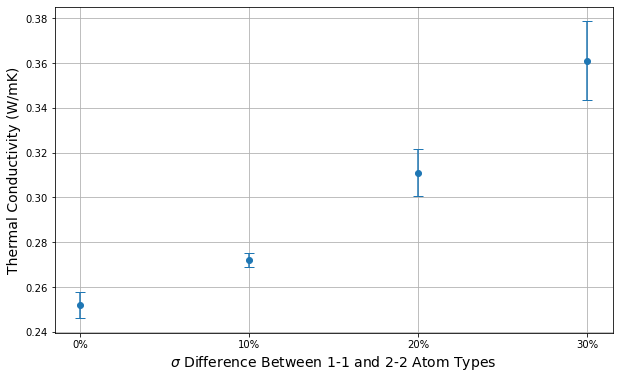

In [30]:
import numpy as np
import matplotlib.pyplot as plt


# Compute mean and SEM
mean_hom = np.mean(results_hom)
std_dev_hom = np.std(results_hom, ddof=1)  # Sample standard deviation (N-1)
sem_hom = std_dev_hom / np.sqrt(len(results_hom))

mean_pm10 = np.mean(results_pm10)
std_dev_pm10 = np.std(results_pm10, ddof=1)  # Sample standard deviation (N-1)
sem_pm10 = std_dev_pm10 / np.sqrt(len(results_pm10))

mean_pm20 = np.mean(results_pm20)
std_dev_pm20 = np.std(results_pm20, ddof=1)  # Sample standard deviation (N-1)
sem_pm20 = std_dev_pm20 / np.sqrt(len(results_pm20))

mean_pm30 = np.mean(results_pm30)
std_dev_pm30 = np.std(results_pm30, ddof=1)  # Sample standard deviation (N-1)
sem_pm30 = std_dev_pm30 / np.sqrt(len(results_pm30))

x_data=("0%", "10%", "20%", "30%")
res = [mean_hom, mean_pm10, mean_pm20, mean_pm30]
error= [sem_hom, sem_pm10, sem_pm20, sem_pm30]

# Plot mean with error bar
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, res, yerr=error, fmt='o', capsize=5)
plt.xlabel(r'$\sigma$ Difference Between 1-1 and 2-2 Atom Types', fontsize=14)
plt.ylabel('Thermal Conductivity (W/mK)', fontsize=14)
plt.grid(True)
plt.show()

Average thermal conductivity as a function of increasing Lennard-Jones parameter variation as a source of controlled disorder. The x-axis shows the difference in the Lennard-Jones parameter $\sigma$ between 1-1 and 2-2 atom types. The data points represent the mean thermal conductivity across 10 independent simulation runs, with error bars indicating the standard error of the mean (SEM). The homogeneous case (0% variation) serves as a reference, while increasing disorder levels (10%, 20%, 30%) correspond to larger deviations in $\sigma$ values for type 1-1 and type 2-2 interactions.

In [31]:
pressure_mean=[8381.78, 9049.89, 11567.46, 16995.96]
pressure_std = [355.5, 367.12, 378.08, 425.75]

In [36]:
import numpy as np

# Given pressure data
pressure_values = [
    17356.672, 17357.478, 16749.172, 16907.946, 17003.113, 16478.4, 16977.366, 16659.94,
    17910.577, 17013.474, 18448.411, 17525.044, 16820.378, 16992.232, 16749.935, 17594.469,
    16879.437, 16747.822, 16367.733, 17356.848, 16824.71, 17679.407, 16867.784, 16754.654,
    17138.011, 16786.96, 16789.968, 16555.899, 16281.92, 16743.602, 16878.545, 16440.551,
    17485.403, 17043.69, 16823.181, 17320.991, 16750.953, 17040.29, 17424.783, 17690.286,
    17097.559, 16322.813, 17096.203, 16825.06, 16507.498, 17073.461, 17412.955, 16871.388,
    16918.186, 16965.256, 16485.482
]

In [37]:
pressure_sem = pressure_std / np.sqrt(len(pressure_values))

In [38]:
print(pressure_sem)

[49.77995699 51.40708244 52.94178942 59.61692458]


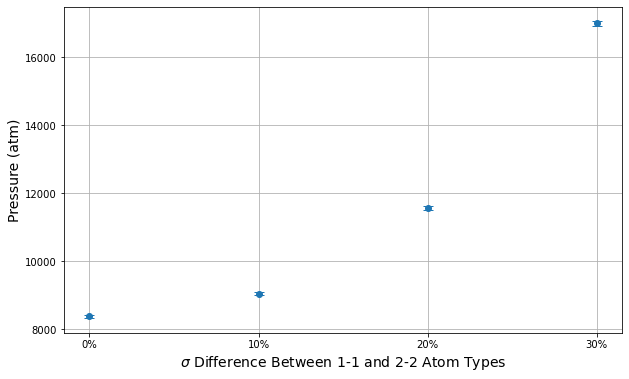

In [39]:
# Plot mean with error bar
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, pressure_mean, yerr=pressure_sem, fmt='o', capsize=5)
plt.xlabel(r'$\sigma$ Difference Between 1-1 and 2-2 Atom Types', fontsize=14)
plt.ylabel('Pressure (atm)', fontsize=14)
plt.grid(True)
plt.show()

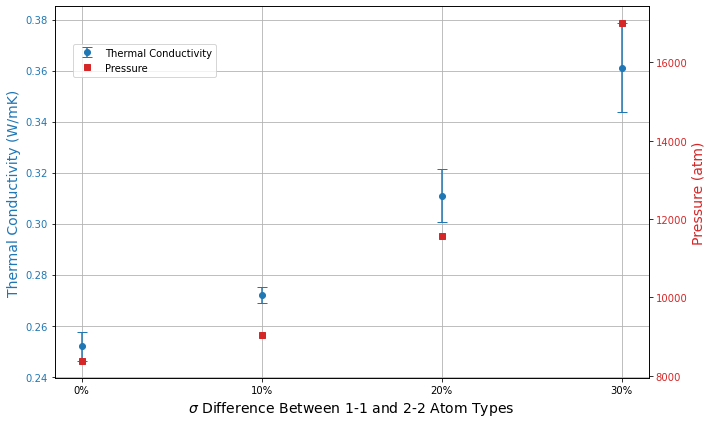

In [47]:
import numpy as np
import matplotlib.pyplot as plt

x_data = ("0%", "10%", "20%", "30%")
thermal_conductivity = [mean_hom, mean_pm10, mean_pm20, mean_pm30]
thermal_error = [sem_hom, sem_pm10, sem_pm20, sem_pm30]

# Create figure and first axis (for thermal conductivity)
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel(r'$\sigma$ Difference Between 1-1 and 2-2 Atom Types', fontsize=14)
ax1.set_ylabel('Thermal Conductivity (W/mK)', color='tab:blue', fontsize=14)
ax1.errorbar(x_data, thermal_conductivity, yerr=thermal_error, fmt='o', capsize=5, color='tab:blue', label='Thermal Conductivity')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second axis (for pressure)
ax2 = ax1.twinx()
ax2.set_ylabel('Pressure (atm)', color='tab:red', fontsize=14)
ax2.errorbar(x_data, pressure_mean, fmt='s', capsize=5, color='tab:red', label='Pressure')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Grid and legend
ax1.grid(True)
fig.tight_layout()
#plt.title('Thermal Conductivity and Pressure vs. σ Difference', fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.savefig('pressure_tc.pdf')
plt.show()

